In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

**Loading the Dataset**

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Getting to know the dataset**

In [3]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [4]:
df.drop(['Id'], axis=1, inplace=True)

In [5]:
df['Species'] = df['Species'].str.replace('Iris-', '')

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**EDA**

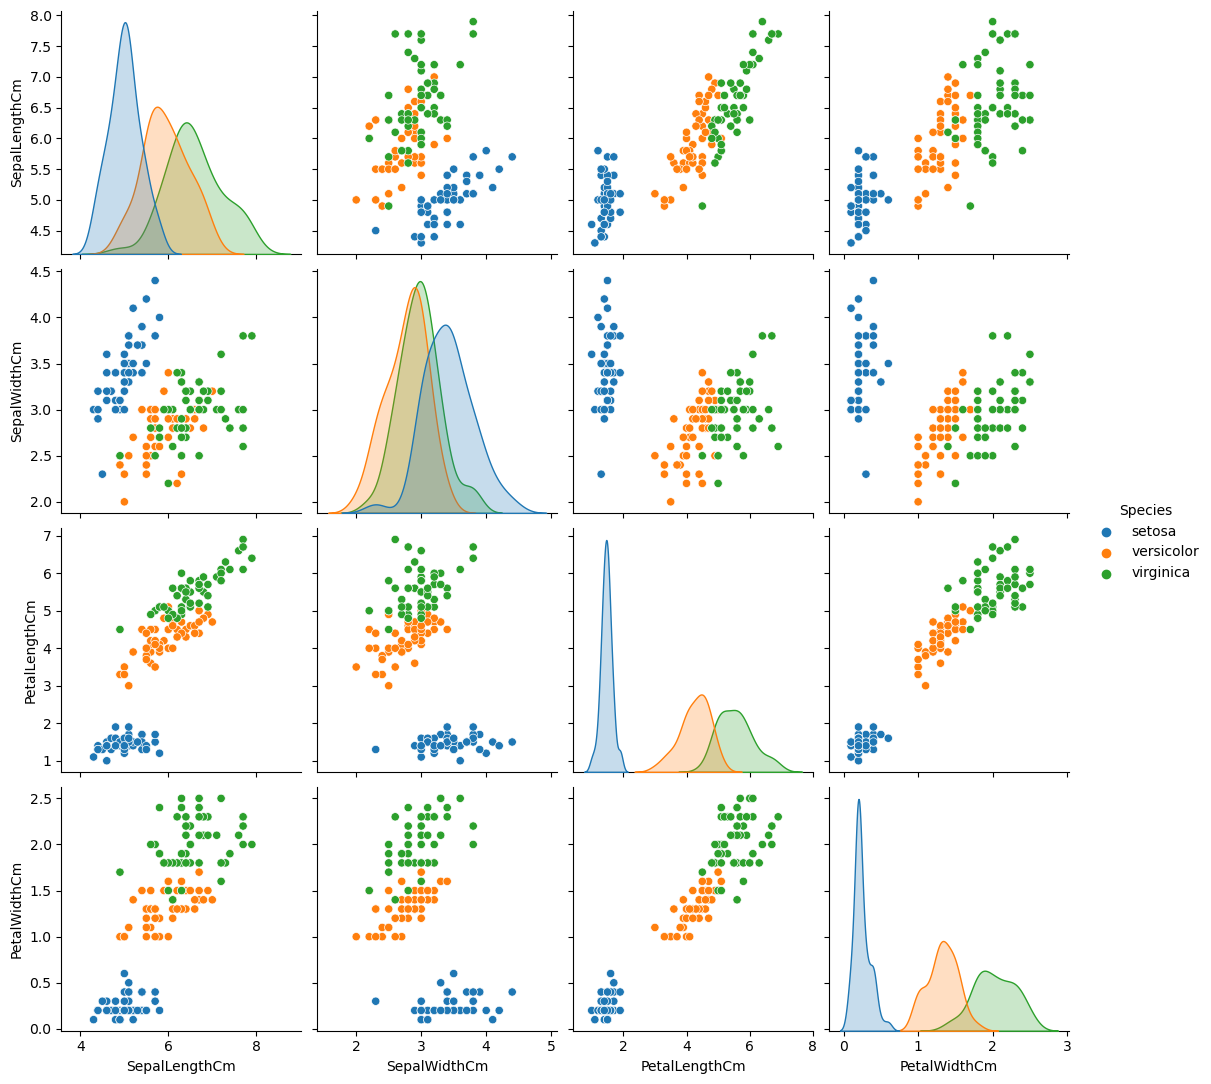

In [8]:
sns.pairplot(df, hue='Species', height=2.75)

Corelation between variables
sepalwidth has a low corelation with the target 

In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
df['Species_Num'] = df['Species']

In [11]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Num
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa


In [16]:
df['Species_Num'] = df['Species_Num'].str.replace('setosa', '1')
df['Species_Num'] = df['Species_Num'].str.replace('versicolor', '2')
df['Species_Num'] = df['Species_Num'].str.replace('virginica', '3')

In [17]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Num
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
 5   Species_Num    150 non-null    object 
dtypes: float64(4), object(2)
memory usage: 7.2+ KB


In [19]:
df['Species_Num'] = pd.to_numeric(df['Species_Num'], downcast='integer')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
 5   Species_Num    150 non-null    int8   
dtypes: float64(4), int8(1), object(1)
memory usage: 6.1+ KB


<Axes: >

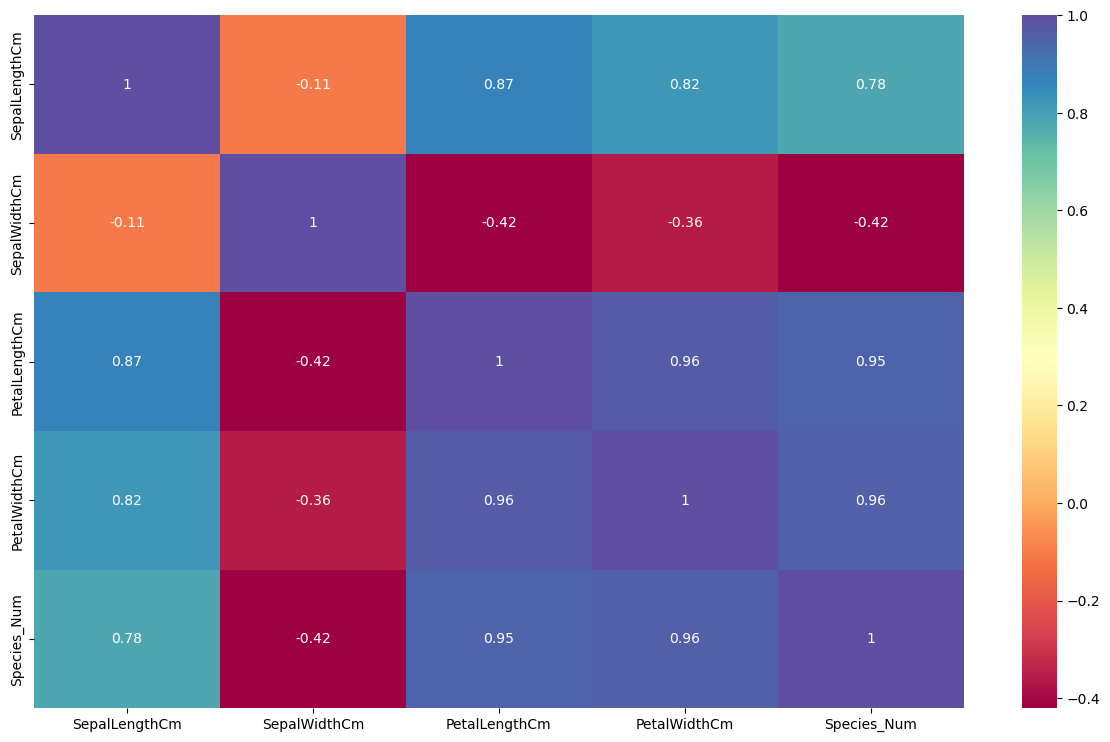

In [22]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.corr(), cmap='Spectral', annot=True)

In [24]:
df.drop(['PetalLengthCm', 'Species_Num'], axis=1, inplace=True)

In [25]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalWidthCm,Species
0,5.1,3.5,0.2,setosa
1,4.9,3.0,0.2,setosa
2,4.7,3.2,0.2,setosa
3,4.6,3.1,0.2,setosa
4,5.0,3.6,0.2,setosa


**Decision Tree Modelling**

In [26]:
X = df.drop(['Species'], axis=1)
y = df.Species

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dt_model = DecisionTreeClassifier()

In [31]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
y_pred = dt_model.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [34]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

Accuracy Score:  0.9736842105263158


In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
cv_scores = cross_val_score(estimator=dt_model, X=X_train, y=y_train, cv=10)
cv_scores.mean()

0.8734848484848484

In [37]:
cv_scores

array([0.91666667, 1.        , 1.        , 1.        , 0.63636364,
       0.81818182, 0.90909091, 0.90909091, 0.90909091, 0.63636364])

In [38]:
print(confusion_matrix(y_test, y_pred))

[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


Text(0.5, 23.52222222222222, 'Predicted Label')

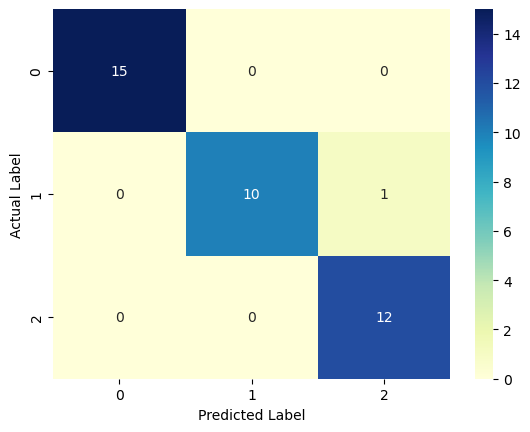

In [39]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot=True, cmap='YlGnBu')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.91      0.95        11
   virginica       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [41]:
from sklearn import tree

In [42]:
list(df.columns[:-1])

['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm']

In [43]:
features = list(df.columns[:-1])
targets = ['setosa', 'versicolor', 'virginica']
print(features)
print(targets)

['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm']
['setosa', 'versicolor', 'virginica']


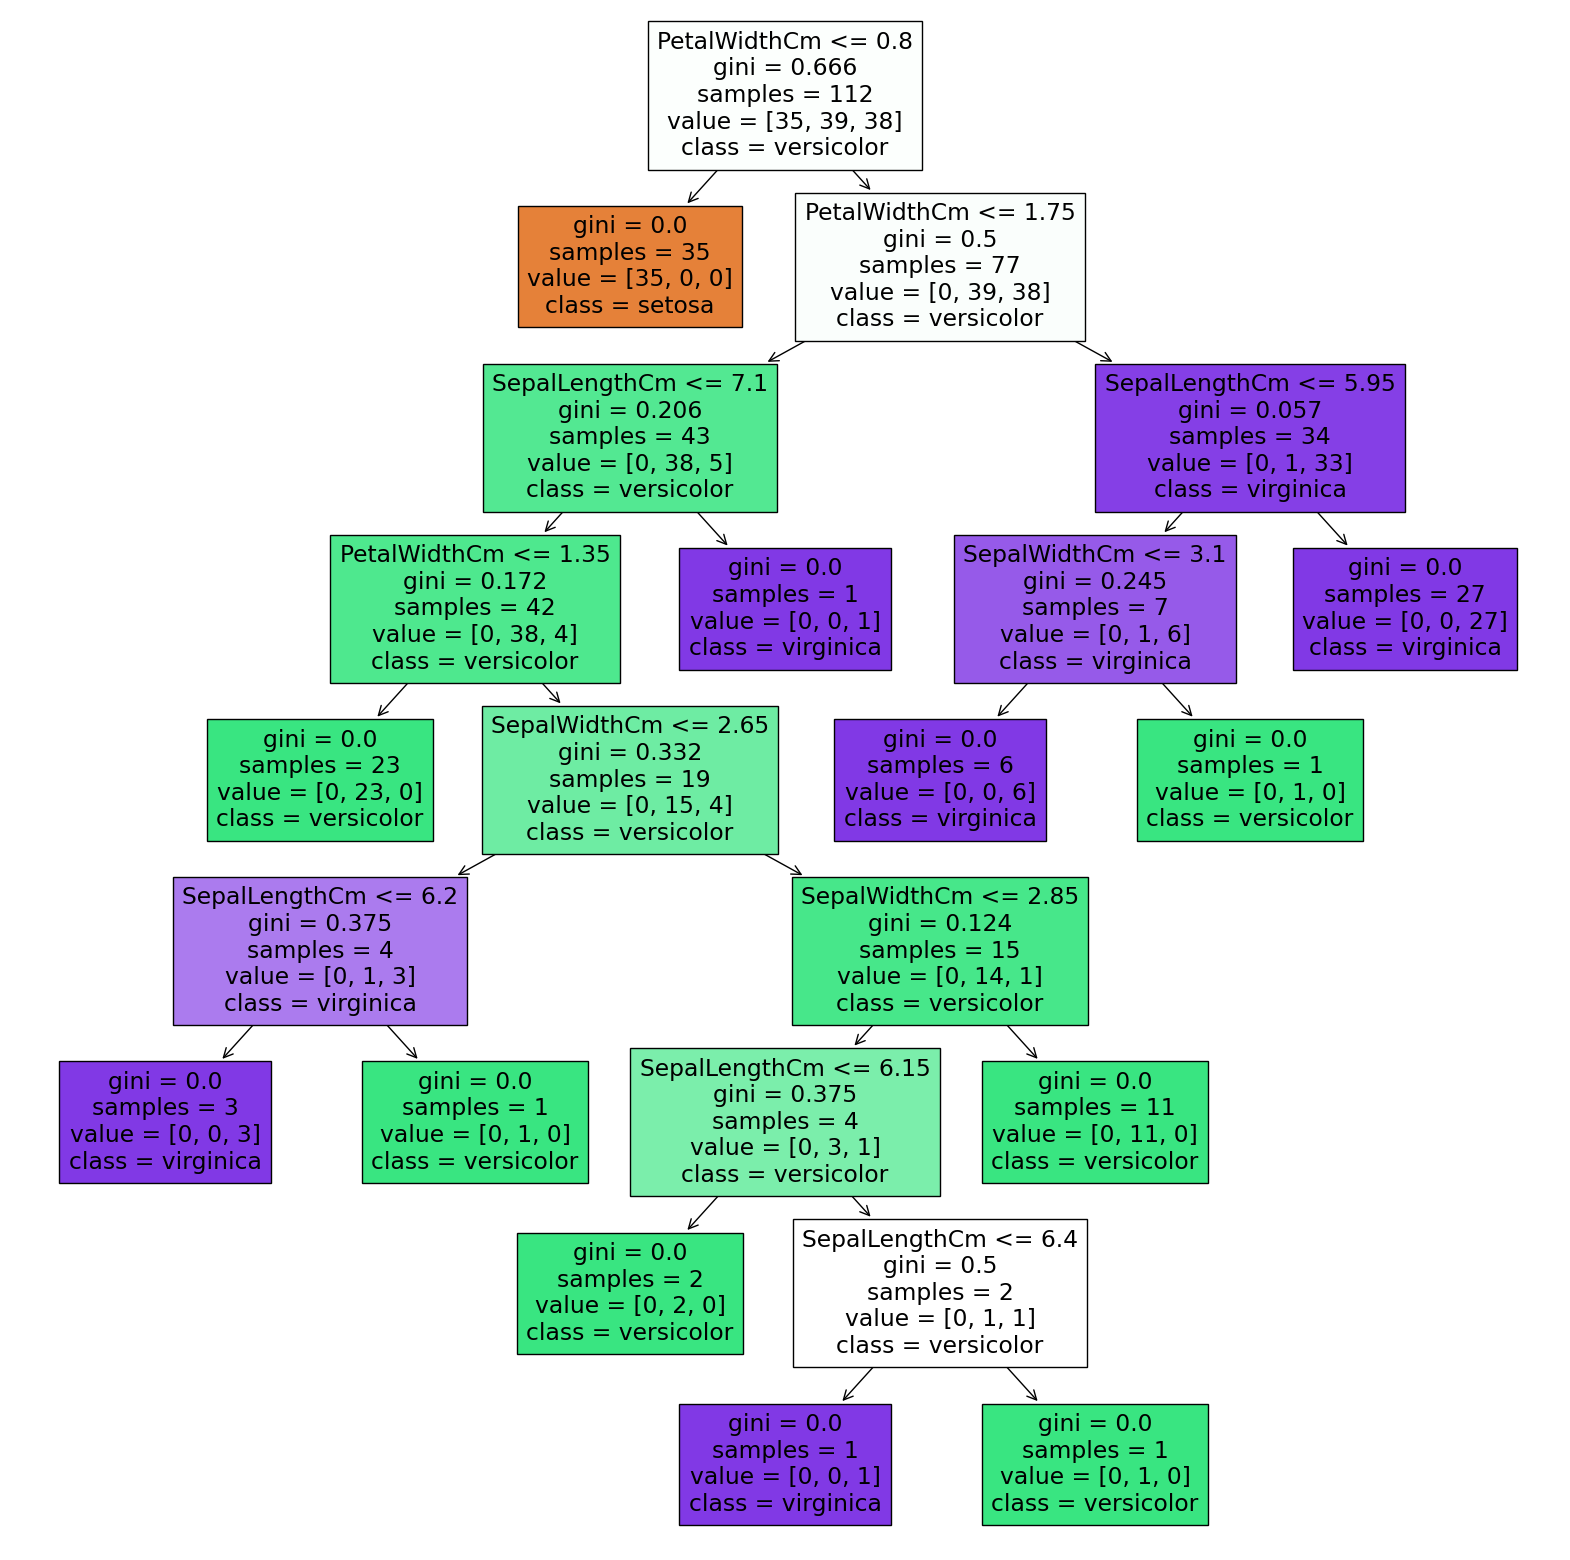

In [44]:
plt.figure(figsize=(20,20))
tree2 = tree.plot_tree(dt_model, filled=True, feature_names=features, class_names=targets)

**Hyperparameter Optimization**

In [45]:
from sklearn.model_selection import GridSearchCV

In [47]:
dt_model2 = DecisionTreeClassifier()

In [48]:
dt_params = {'criterion': ['gini', 'entropy'], 
             'max_depth': np.arange(2,14,2), 
             'max_features': ['auto', 'sqrt', 'log2']}

In [49]:
dt_cv_model = GridSearchCV(estimator=dt_model2, param_grid=dt_params, cv=10)

In [50]:
dt_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  4,  6,  8, 10, 12]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [51]:
dt_cv_model.best_params_

{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto'}

In [52]:
dt_tuned = DecisionTreeClassifier(criterion='gini', max_depth=6, max_features='auto')

In [53]:
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_features='auto')

In [54]:
y_pred = dt_tuned.predict(X_test) 


In [55]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

Accuracy Score:  1.0


In [58]:
cv_scores = cross_val_score(estimator=dt_tuned, X=X_train, y=y_train, cv=10)
cv_scores.mean()

0.8916666666666666

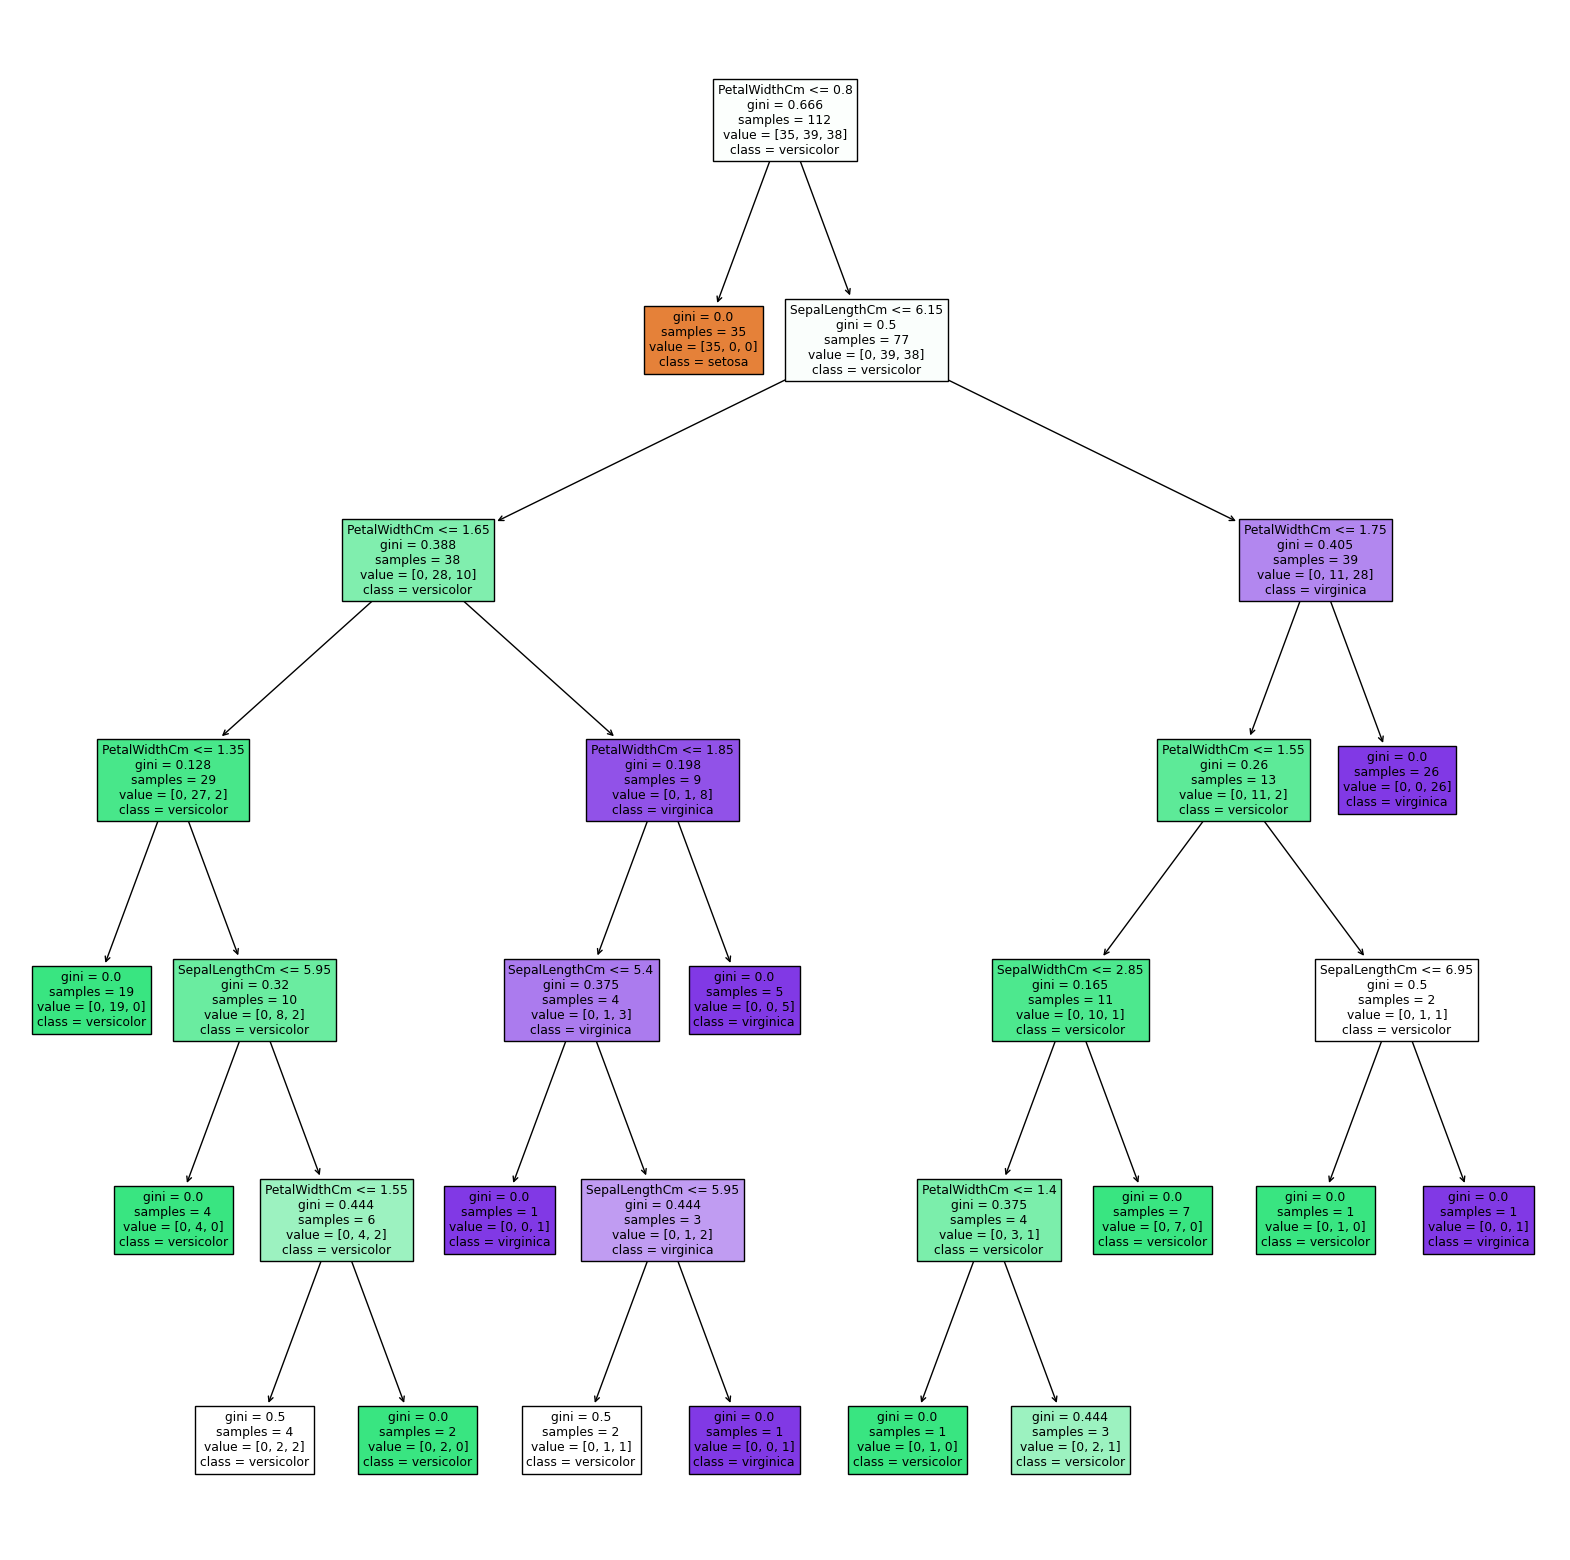

In [59]:
plt.figure(figsize=(20,20))
tree2 = tree.plot_tree(dt_tuned, filled=True, feature_names=features, class_names=targets)